In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pmdarima import auto_arima

In [82]:
df = pd.read_csv('cofee.csv', index_col='Month', parse_dates=True)
df.head()

,Price,Change
Month,,
2000-04-01,0.98,-
2000-05-01,0.98,0.00 %
2000-06-01,0.94,-4.08 %
2000-07-01,0.90,-4.26 %
2000-08-01,0.84,-6.67 %


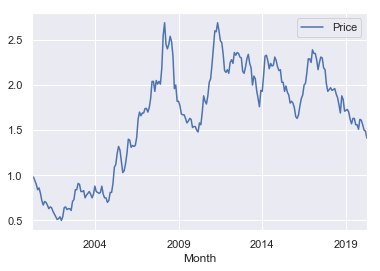

In [83]:
df.plot();

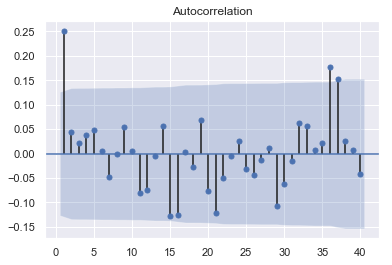

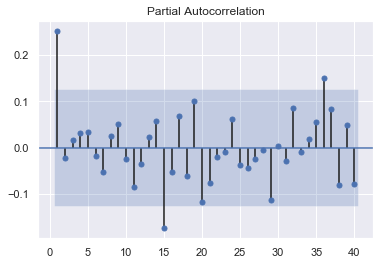

In [84]:
sgt.plot_acf(df.Price.diff(1).iloc[1:], zero=False, lags=40)
sgt.plot_pacf(df.Price.diff(1).iloc[1:], zero=False, lags=40);

In [85]:
auto_arima(df.Price)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

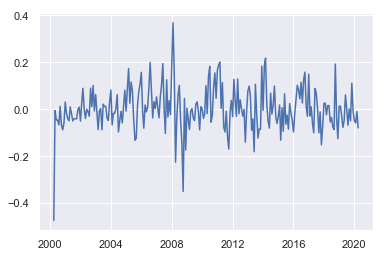

In [86]:
#model=ARIMA(df.Price,order=(1,1,0))
model=ARMA(df.Price,order=(1,0))
results=model.fit()
plt.plot(results.resid)
#plt.plot(results.fittedvalues)
#df["res"]=df.Price - results.fittedvalues
#df.plot();

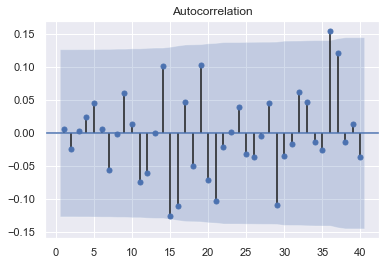

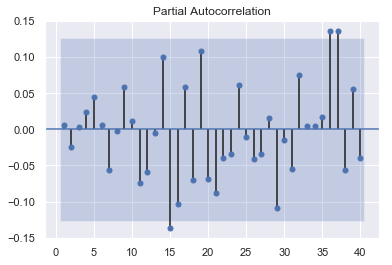

In [74]:
res = results.resid
sgt.plot_acf(res, zero=False, lags=40)
sgt.plot_pacf(res, zero=False, lags=40);

In [75]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(res, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,2.550461,0.99012


In [44]:
noise = np.random.random(1000)
sm.stats.acorr_ljungbox(noise, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,8.380613,0.591712


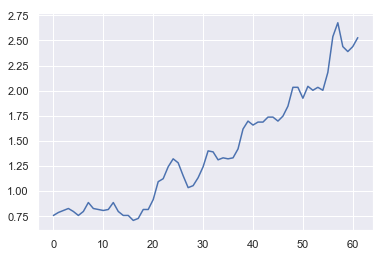

In [61]:
test = model.predict(results.params, start=39, end=100)
plt.plot(test)